# Customer Segmentation
In this excercise we will slice and dice the customer-segment dataset. it's toy dataset meant for basic EDA and Clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as snb
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [2]:
snb.set(style="darkgrid")

In [3]:
data = pd.read_csv(r"../input/Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Male Vs Female

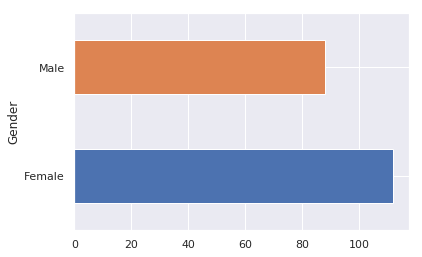

In [6]:
data.groupby('Gender')['CustomerID'].nunique().plot(kind='barh')

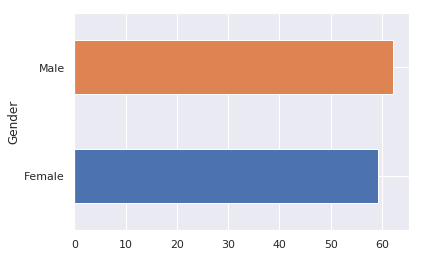

In [7]:
data.groupby('Gender')['Annual Income (k$)'].mean().plot(kind='barh')

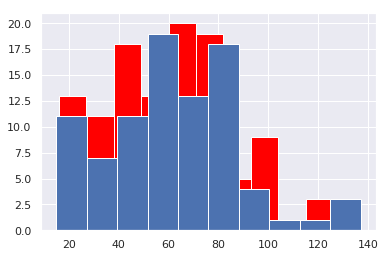

In [8]:
data.loc[data['Gender']=='Female']['Annual Income (k$)'].hist(bins=10,color='red')
data.loc[data['Gender']=='Male']['Annual Income (k$)'].hist(bins=10)

in the data provided Male seems to be earning slightly higher then females

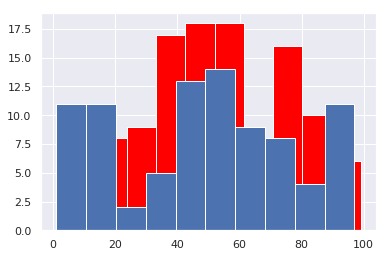

In [9]:
data.loc[data['Gender']=='Female']['Spending Score (1-100)'].hist(bins=10,color='red')
data.loc[data['Gender']=='Male']['Spending Score (1-100)'].hist(bins=10)

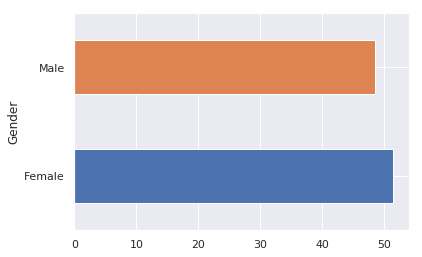

In [10]:
data.groupby('Gender')['Spending Score (1-100)'].mean().plot(kind='barh')

However female seems to be leading in spending

#### We can do a hypothesis test and see if spending pattern indicated in sample is true over the population or not
<b>Hypothesis 1</b>
<br>
<b>avg_score_female:</b> Avarage spending score for females
<br>
<b>avg_score_male:</b> Avaarage spending score or male
<br><br>
<b>Null Hypothesis</b> avg_score_male <= avg_score_male
<br>
<b>Alternate Hypothesis</b> avg_score_male <= avg_score_male

In [12]:
avg_sample_score_female = data.loc[data['Gender']=='Female','Spending Score (1-100)',].mean()
avg_sample_score_male = data.loc[data['Gender']=='Male','Spending Score (1-100)'].mean()
n_female = data.loc[data['Gender']=='Female','Gender'].count()
n_male = data.loc[data['Gender']=='Male','Gender'].count()
sample_score_female_var = data.loc[data['Gender']=='Female','Spending Score (1-100)'].var()
sample_score_male_var = data.loc[data['Gender']=='Male','Spending Score (1-100)'].var()

t_num = avg_sample_score_female-avg_sample_score_male
t_den = np.sqrt((sample_score_female_var/n_female)+(sample_score_male_var/n_male))
t_stat = t_num/t_den

df_num = np.square((sample_score_female_var/n_female)+(sample_score_male_var/n_male))
df_den1 = np.square(sample_score_female_var/n_female)/(n_female-1)
df_den2 = np.square(sample_score_male_var/n_male)/(n_male-1)
df = df_num/(df_den1+df_den2)

In [13]:
p_val = 1-stats.t.cdf(t_stat,df=df)
p_val

0.21099886223891806

The P-Value is quite high. If we consider 0.05 as critical value then we cannot reject the Null Hypothesis. Hence we can't say conclusivley that spending pattern indicated in the sampe is true for the population as well.

### Age Vs Annual Income

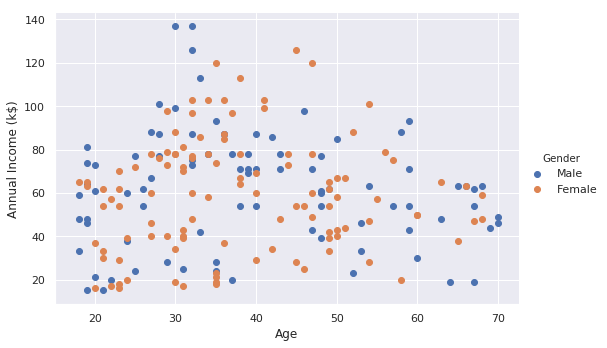

In [14]:
fg = snb.FacetGrid(data=data,hue='Gender',height=5,aspect=1.5)
fg.map(plt.scatter,'Age','Annual Income (k$)').add_legend()

In [15]:
bins = pd.IntervalIndex.from_tuples([(0,20),(20,30),(30,40),(40,50),(50,60),(60,70)])
data['Age_cat'] = pd.cut(data['Age'],bins)

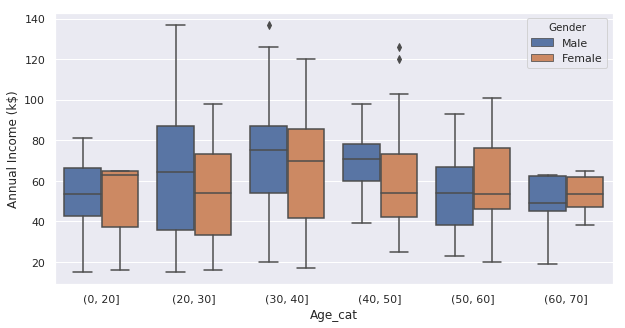

In [16]:
fig,ax = plt.subplots(figsize=(10,5))
snb.boxplot(x='Age_cat',y='Annual Income (k$)',hue='Gender',data=data,ax=ax)

Looks like the annual income is on the lower side on the tails (age group 0,20 & 60,70). There is no apparent distiction in the trend for male and that for female. However data is too noisy & scatter to say anything conclusively.

### Age Vs Spending Score

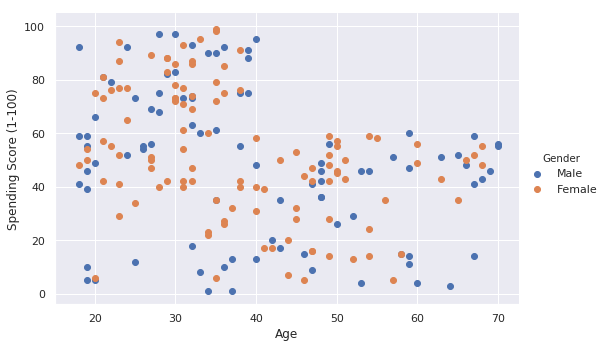

In [17]:
fig = snb.FacetGrid(data=data,hue='Gender',height=5,aspect=1.5)
fig.map(plt.scatter,'Age','Spending Score (1-100)').add_legend()

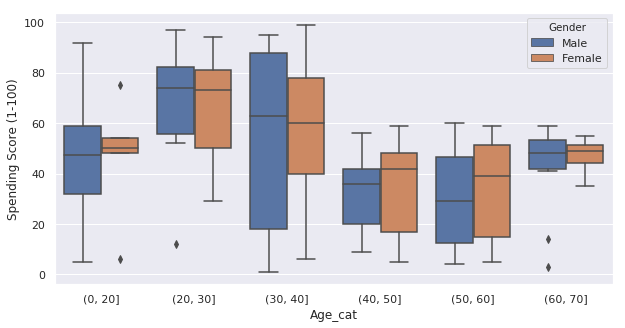

In [18]:
fig,ax = plt.subplots(figsize=(10,5))
snb.boxplot(data=data,x='Age_cat',y='Spending Score (1-100)',hue='Gender',ax=ax)

Here again looks like the spending score goes down as the age increases.But again, data is too noisy and scattered to say anything conclusivly.

### Annual Income Vs Spending Score

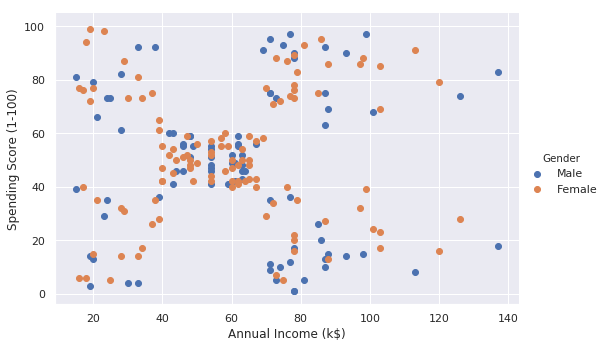

In [20]:
fig = snb.FacetGrid(data=data,hue='Gender',height=5,aspect=1.5)
fig.map(plt.scatter,'Annual Income (k$)','Spending Score (1-100)').add_legend()

In [21]:
bins = pd.IntervalIndex.from_tuples([(0,20),(20,40),(40,60),(60,80),(80,100),(100,120),(120,140)])
data['Annual_income_cat'] = pd.cut(data['Annual Income (k$)'],bins)

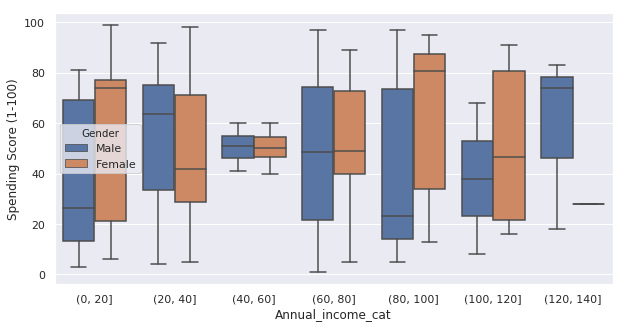

In [22]:
fig,ax = plt.subplots(figsize=(10,5))
snb.boxplot(data=data,x='Annual_income_cat',y='Spending Score (1-100)',hue='Gender',ax=ax)

No sure what to make of this. The variance dramatically shirnks for the Income group 40,60 but is spred out everywhere else. could be a quark in the sample taken.

# K-mean Clustering

In [23]:
data = pd.read_csv(r"../input/Mall_Customers.csv")

In [24]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
train_test_data = data.copy()
train_test_data = train_test_data.drop('CustomerID',axis=1)
train_test_data['Gender'] = pd.Categorical(train_test_data['Gender']).codes
train_test_data['Age'] = (train_test_data['Age'] - train_test_data['Age'].mean())/(train_test_data['Age'].max()-train_test_data['Age'].min())
train_test_data['Annual Income (k$)'] = (train_test_data['Annual Income (k$)'] - train_test_data['Annual Income (k$)'].mean())/(train_test_data['Annual Income (k$)'].max()-train_test_data['Annual Income (k$)'].min())
train_test_data['Spending Score (1-100)'] = train_test_data['Spending Score (1-100)']/100
train_test_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-0.381731,-0.373443,0.39
1,1,-0.343269,-0.373443,0.81
2,0,-0.362500,-0.365246,0.06
3,0,-0.304808,-0.365246,0.77
4,0,-0.150962,-0.357049,0.40


In [26]:
train_data,test_data = train_test_split(train_test_data,test_size=0.2)

In [27]:
intertia = []
for k in range(1,20):
    kmean_clf = KMeans(n_clusters=k).fit(train_data)
    intertia.append(kmean_clf.inertia_)

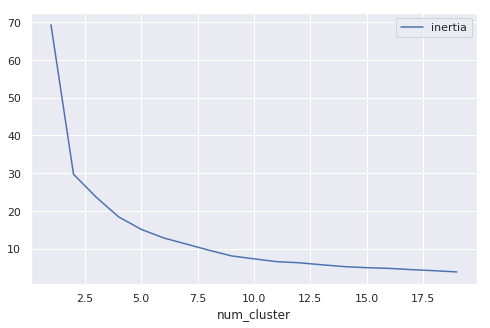

In [28]:
df = pd.DataFrame(list(zip(range(1,20),intertia)),columns=['num_cluster','inertia'])
fig,ax = plt.subplots(figsize=(8,5))
df.plot(x='num_cluster',y='inertia',kind='line',ax=ax)

from the elbow plot above 4 seems to be reasonable number for the number of clusters. Let's see how we perfrom on the test set

In [29]:
kmean_clf = KMeans(n_clusters=5).fit(train_data)
kmean_clf.score(test_data)

-3.897733183929173

Score is fine.Let's now try to plot the culsters and see if clusters appear visually seperable or not.

In [30]:
train_data['cluster'] = kmean_clf.labels_

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


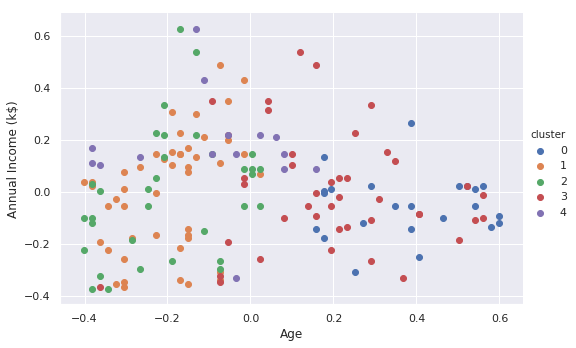

In [31]:
fig = snb.FacetGrid(data=train_data,hue='cluster',height=5,aspect=1.5)
fig.map(plt.scatter,'Age','Annual Income (k$)').add_legend()

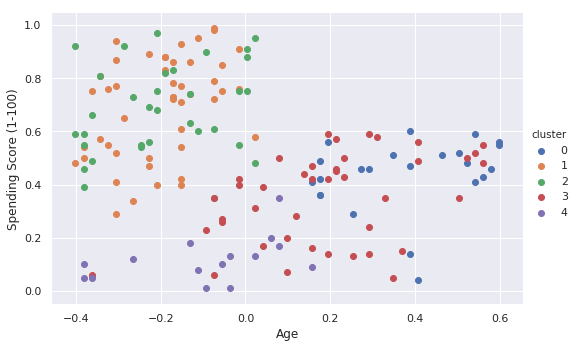

In [32]:
fig = snb.FacetGrid(data=train_data,hue='cluster',height=5,aspect=1.5)
fig.map(plt.scatter,'Age','Spending Score (1-100)').add_legend()

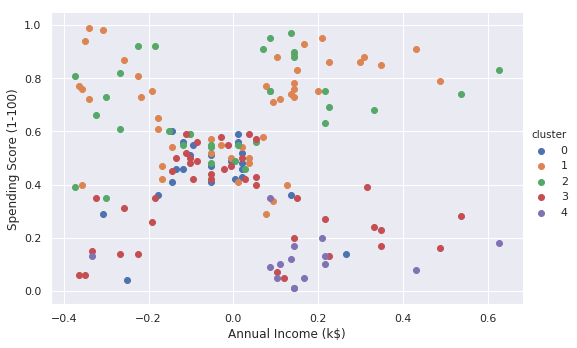

In [33]:
fig = snb.FacetGrid(data=train_data,hue='cluster',height=5,aspect=1.5)
fig.map(plt.scatter,'Annual Income (k$)','Spending Score (1-100)').add_legend()

The visual are not so great whatever way we slice it. let's try one more run of KMean clustering but this time let's do it on selected features instead of all features.

### Age & Total Income

In [34]:
train_test_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-0.381731,-0.373443,0.39
1,1,-0.343269,-0.373443,0.81
2,0,-0.362500,-0.365246,0.06
3,0,-0.304808,-0.365246,0.77
4,0,-0.150962,-0.357049,0.40


In [35]:
data_sub = train_test_data[['Age','Annual Income (k$)']]
data_sub.head()

,Age,Annual Income (k$)
0,-0.381731,-0.373443
1,-0.343269,-0.373443
2,-0.362500,-0.365246
3,-0.304808,-0.365246
4,-0.150962,-0.357049


In [36]:
inertia = []
for k in range(1,10):
    kmean_clf = KMeans(n_clusters=k).fit(data_sub)
    inertia.append(kmean_clf.inertia_)

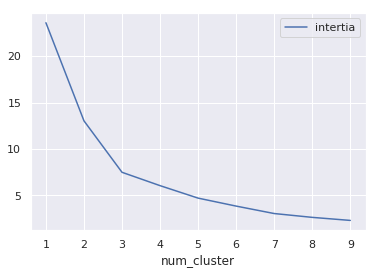

In [37]:
df = pd.DataFrame(list(zip(range(1,10),inertia)),columns=['num_cluster','intertia'])
df.plot(x='num_cluster',y='intertia',kind='line')

From above elbow plot 5 looks like a reasonable number to pick

In [38]:
kmean_clf = KMeans(n_clusters=5).fit(data_sub)

In [39]:
data_sub['centroid'] = kmean_clf.labels_

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


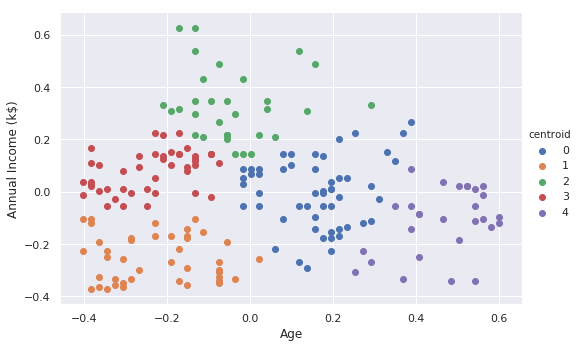

In [40]:
fig = snb.FacetGrid(data=data_sub,hue='centroid',height=5,aspect=1.5)
fig.map(plt.scatter,'Age','Annual Income (k$)').add_legend()

This is much batter. Clusters are neatly separable. 
<br>
<b> Cluster 0</b> these are people in middle age group and have higher income.Traget audience for high end product.
<br>
<b> Cluster 1</b> these are people spread through young to middle age group and have lower income. Can be targated for discuounts & offers.
<br>
<b> Cluster 2</b> these are people from old age ad have relatively lower income. targated for Product meant for the age group with lower price points.
<br>
<b> Cluster 3</b> these are people from old age ad have relatively lower income. targated for Product meant for the age group with lower price points. 
<br>
<b> Cluster 4</b> these are people from young age group and have relatively higher income. good target for high end tech products.

### Age & Spending Score

In [42]:
data_sub = train_test_data[['Age','Spending Score (1-100)']]
data_sub.head()

,Age,Spending Score (1-100)
0,-0.381731,0.39
1,-0.343269,0.81
2,-0.362500,0.06
3,-0.304808,0.77
4,-0.150962,0.40


In [43]:
inertia = []
for k in range(1,10):
    kmean_clf = KMeans(n_clusters=k).fit(data_sub)
    inertia.append(kmean_clf.inertia_)

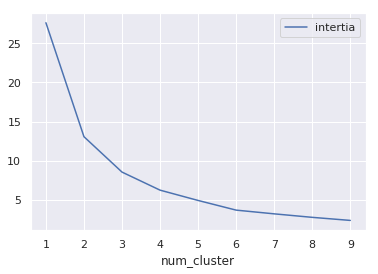

In [44]:
df = pd.DataFrame(list(zip(range(1,10),inertia)),columns=['num_cluster','intertia'])
df.plot(x='num_cluster',y='intertia',kind='line')

In [45]:
kmean_clf = KMeans(n_clusters=5).fit(data_sub)

In [46]:
data_sub['centroid'] = kmean_clf.labels_

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


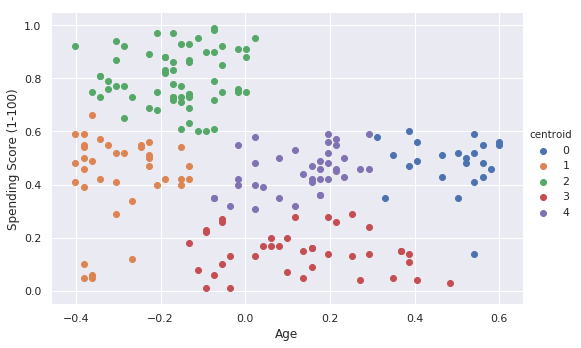

In [47]:
fig = snb.FacetGrid(data=data_sub,hue='centroid',height=5,aspect=1.5)
fig.map(plt.scatter,'Age','Spending Score (1-100)').add_legend()

Again success! The clusters looks clean.
<br>
We can look at individual clusters and build strategy like before. for now I want to point at cluster 2 (Green). Customer in this cluster belong to younger age group and have high spending score. This is interesting from marketing standpoint. 

### Spending Score & Total Income

In [48]:
data_sub = train_test_data[['Annual Income (k$)','Spending Score (1-100)']]
data_sub.head()

,Annual Income (k$),Spending Score (1-100)
0,-0.373443,0.39
1,-0.373443,0.81
2,-0.365246,0.06
3,-0.365246,0.77
4,-0.357049,0.40


In [49]:
inertia = []
for k in range(1,10):
    kmean_clf = KMeans(n_clusters=k).fit(data_sub)
    inertia.append(kmean_clf.inertia_)

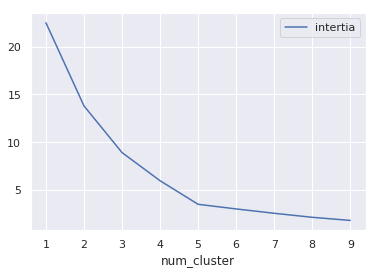

In [50]:
df = pd.DataFrame(list(zip(range(1,10),inertia)),columns=['num_cluster','intertia'])
df.plot(x='num_cluster',y='intertia',kind='line')

In [51]:
kmean_clf = KMeans(n_clusters=5).fit(data_sub)

In [52]:
data_sub['centroid'] = kmean_clf.labels_

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


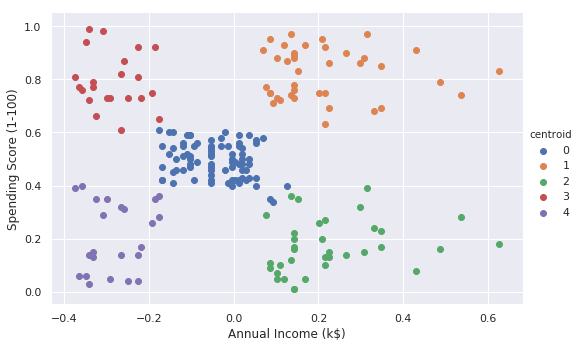

In [53]:
fig = snb.FacetGrid(data=data_sub,hue='centroid',height=5,aspect=1.5)
fig.map(plt.scatter,'Annual Income (k$)','Spending Score (1-100)').add_legend()

Again the Clusters are really neat. 
<br>
Here again the cluster 2 (green) is interesting. Customer in this group belong to higher income group and spend high too.

# Conclusion
The clusters came out really neat when we did clustering on selected features. This is not to say that the clusters created with all features was bad. Mayby it was only the visualization that was not clear.